<a href="https://colab.research.google.com/github/AnceriseAsul/Astron/blob/main/Dark_Energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

calculate the universe age base on hubble constant

In [1]:
import astropy.constants as const #package for physics constants
import astropy.units as u #package forphysics units
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii
import astropy.units as u
import astropy.constants as ac

Now For Dark Energy

In [2]:
# upload data
from google.colab import files
uploaded = files.upload()

Saving Tonry_2003.vot to Tonry_2003.vot


In [3]:
# read data
dat = astropy.io.ascii.read("Tonry_2003.vot")

/usr/local/lib/python3.10/dist-packages/astropy/io/ascii/html.py:91: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  soup = BeautifulSoup("\n".join(lines))


So now lets plot the data from the file

Text(0, 0.5, 'Velocity [km/s]')

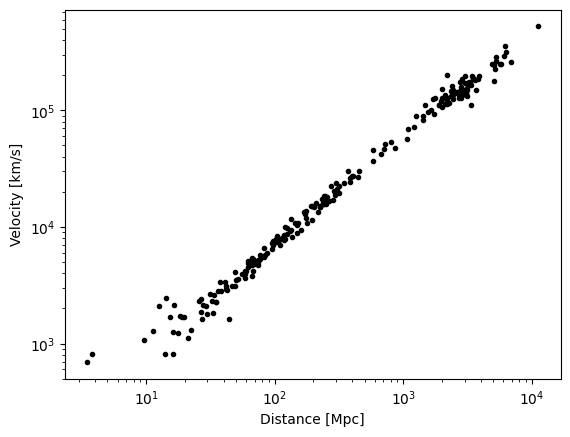

In [4]:
# X axis distance create array
distance = 10**dat["col8"] / 72.0 * u.mpc
# X error bar
distance_error = (10**(dat["col8"]+dat["col9"]) - 10**dat["col8"]) / 72.0 * u.mpc
# Y axis velocity create array
velocity = 10**dat["col7"] * u.km / u.s
# plot without error bar
plt.plot(distance.to(u.mpc).value, velocity.to(u.km / u.s).value, marker=".", color="black", linestyle="none")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Distance [Mpc]")
plt.ylabel("Velocity [km/s]")

limit the range and plot the data again with error bar

Text(0, 0.5, 'Velocity [km/s]')

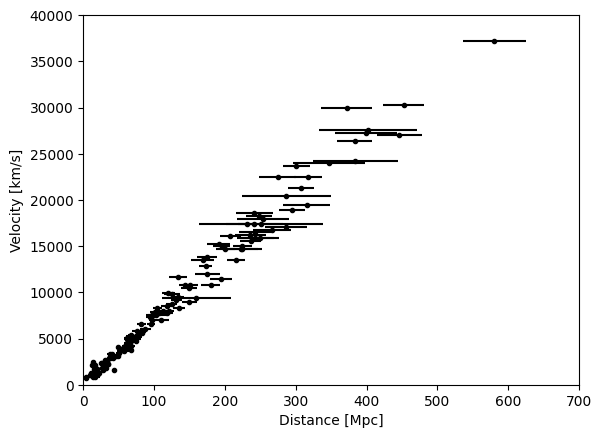

In [5]:
# only look at limit range
distance = 10**dat["col8"] / 72.0 * u.mpc
velocity = 10**dat["col7"] * u.km / u.s
# plot with error bar
plt.errorbar(distance.to(u.mpc).value, velocity.to(u.km / u.s).value, xerr=distance_error.to(u.mpc).value, marker=".", color="black", linestyle="none")
# range limit
plt.xlim(0, 700)
plt.ylim(0, 4e4)
plt.xlabel("Distance [Mpc]")
plt.ylabel("Velocity [km/s]")

Use linear equation to fit our data and calculate the slope (which is Hubble Constant)

In [6]:
# range limit
x = distance.to(u.mpc).value
ind = np.where((x > 0) & (x < 700))

# polyfit data with linear equation
z_linear = np.polyfit(distance.to(u.mpc).value[ind],velocity.to(u.km / u.s).value[ind],1)
p = np.poly1d(z_linear)
# print Hubble Constant and intercept
print("Slope = ", z_linear[0], " which represents H0")
print("Y-intercept = ", z_linear[1])
# save model
linear_model = p(distance.to(u.mpc).value)

Slope =  67.48137250840927  which represents H0
Y-intercept =  355.24954905559264


Plot our fitting line with data

Text(50, 30000, 'H0 = 67.48 km/s/Mpc')

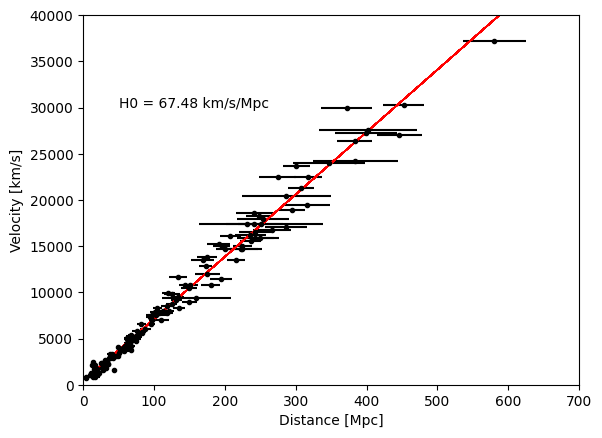

In [7]:
#rename array we use
distance = 10**dat["col8"] / 72.0 * u.mpc
velocity = 10**dat["col7"] * u.km / u.s
#plot data with error bar
plt.errorbar(distance.to(u.mpc).value, velocity.to(u.km / u.s).value, xerr=distance_error.to(u.mpc).value, marker=".", color="black", linestyle="none")
#overplot our fitting model on top of data
plt.plot(distance.to(u.mpc).value, linear_model, color="red", linewidth=1)
plt.xlim(0, 700)
plt.ylim(0, 4e4)
plt.xlabel("Distance [Mpc]")
plt.ylabel("Velocity [km/s]")

# legend for Hubble Constant
plt.annotate(r"H0 = {0:5.2f} km/s/Mpc".format(z_linear[0]), xy=(50, 30000))

Now we have the Hubble Constant, It's time to calculate the age of our universe.

In [8]:
#set our slope value as Hubble Constant
H0 = z_linear[0]

# Convert Hubble constant to 1/s
H0_s = H0 * (u.km / u.s / u.Mpc)

# Age of the Universe in seconds
age_universe_seconds = 1 / H0_s

# Convert age from seconds to years
age_universe_years = age_universe_seconds.to(u.year)

# Print the age of the Universe
print(f"The age of the Universe is approximately {age_universe_years.value:.2e} years.")

The age of the Universe is approximately 1.45e+10 years.


 Breaking the data in half, calculate the Hubble constant in each half and compare them.

In [9]:
# split the data based on data point in equal number
def split_data_equal_number(z_linear):
    sorted_data = np.sort(z_linear)
    # split
    mid_index = len(sorted_data) // 2
    first_half = sorted_data[:mid_index]
    second_half = sorted_data[mid_index:]
    return first_half, second_half

# rerun the code
first_half_num, second_half_num = split_data_equal_number(z_linear)

print(f"First part data(based on the number of data point): {first_half_num}")
print(f"Second part data(based on the number of data point): {second_half_num}")



First part data(based on the number of data point): [67.48137251]
Second part data(based on the number of data point): [355.24954906]


The first part is 67.48, the second part is 355.24. Second part is higher than first part, which means that hubble constant is increase.